
# Superstore Sales Descriptive & Exploratory Data Analysis (EDA)

**Author:** Roy Lahav 
**Dataset:** Superstore_clean (CSV)

## Objective
Perform an exploratory data analysis (EDA) on the **Superstore Sales dataset** to uncover key trends, patterns, and relationships across sales, profit, customers, and product categories.

## Key Questions
1. What are the overall sales and profit trends?
2. Which regions, categories, and products drive the most revenue or losses?
3. Are there correlations between discounts, profit, and sales?
4. What seasonal or monthly patterns can we observe?

## Tools
- Python: `pandas`, `numpy`, `matplotlib`, `seaborn`
- Jupyter Notebook


## 1) Setup & Data Loading

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization defaults
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)

DATA_PATH = '/Users/roylahav/Code/Superstore_cleaned.csv'

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(
        f"Dataset not found at {DATA_PATH}. Please add it under the data/ folder."
    )

df = pd.read_csv(DATA_PATH)
print('Loaded dataset shape:', df.shape)
df.head()


Loaded dataset shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2) Data Overview & Structure

In [2]:

# Display structure and sample stats
df.info()
df.describe(include='all').T.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,9994.0,NaN,NaN,NaN,4997.5,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1237,09/05/2016,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9994,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**Comment:**  
This summary helps confirm data types and detect anomalies (like mixed numeric columns or missing data).


## 3) Data Cleaning

In [3]:

# Convert date columns
for col in ['Order Date', 'Ship Date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop duplicates
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)

print(f'Removed {before - after} duplicate rows.')
print('Null values per column:')
df.isnull().sum()


Removed 0 duplicate rows.
Null values per column:


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


**Comment:**  
No critical missing data expected. If small amounts exist, we’ll leave them or handle them selectively later.


## 4) Basic Metrics Overview

In [6]:

# Compute basic KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer Name'].nunique()

print(f'Total Sales: ${total_sales:,.0f}')
print(f'Total Profit: ${total_profit:,.0f}')
print(f'Total Orders: {total_orders:,}')
print(f'Total Customers: {total_customers:,}')


Total Sales: $2,297,201
Total Profit: $286,397
Total Orders: 5,009
Total Customers: 793



**Comment:**  
These values set the scale for further analysis (e.g., profit margin, per-order averages).


## 5) Univariate Analysis: Sales & Profit Distribution

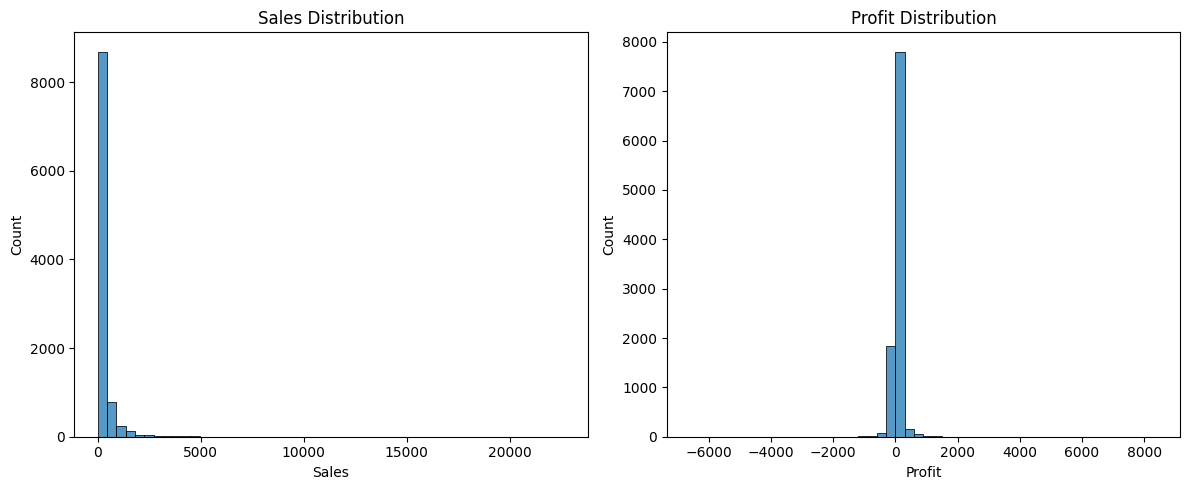

In [7]:

fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['Sales'], bins=50, ax=axes[0])
axes[0].set_title('Sales Distribution')
sns.histplot(df['Profit'], bins=50, ax=axes[1])
axes[1].set_title('Profit Distribution')
plt.tight_layout()
plt.show()



**Comment:**  
Sales are typically right-skewed, showing that most orders are small. Profit distribution may have both gains and losses — check for negative values (loss-making sales).


## 6) Bivariate Analysis: Discounts, Sales, and Profit

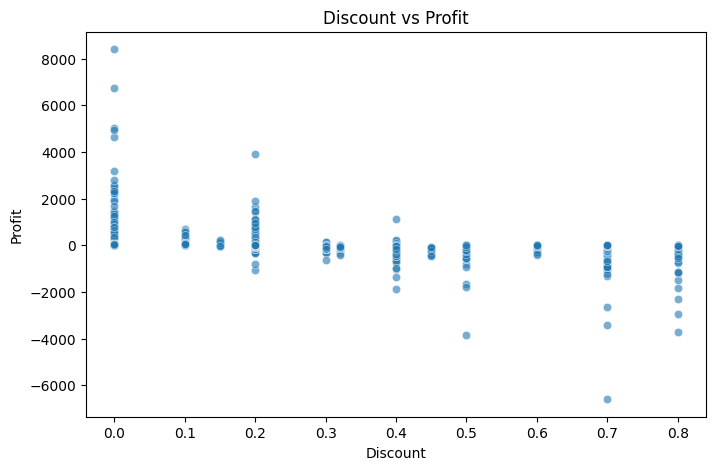

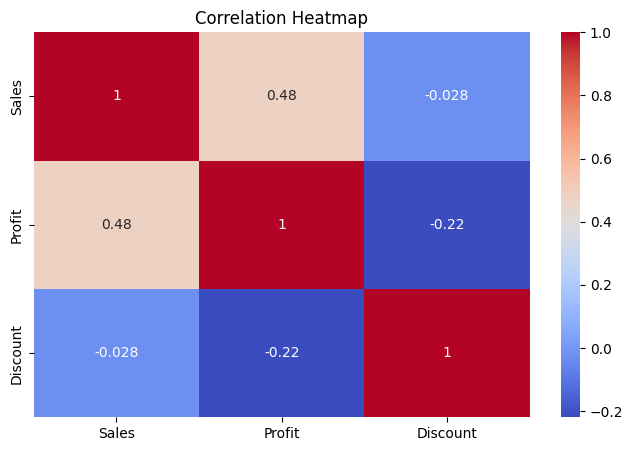

In [8]:

sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

corr = df[['Sales','Profit','Discount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



**Comment:**  
Discounts often correlate negatively with profit. This chart helps visualize that relationship.


## 7) Regional & Category Breakdown

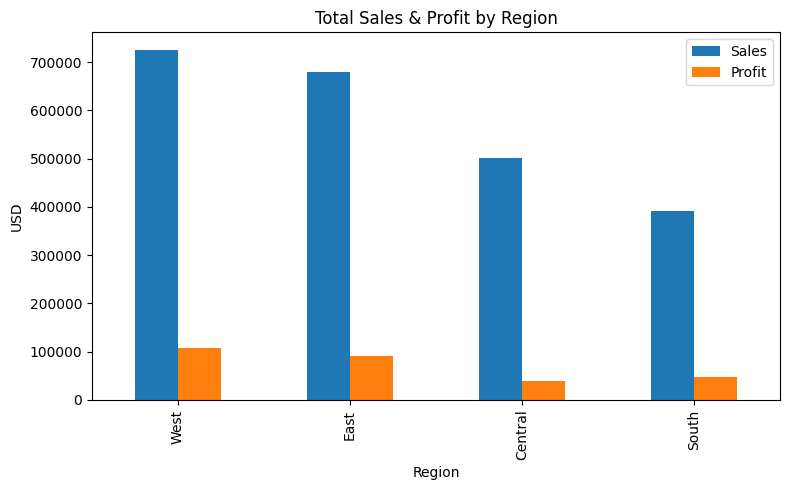

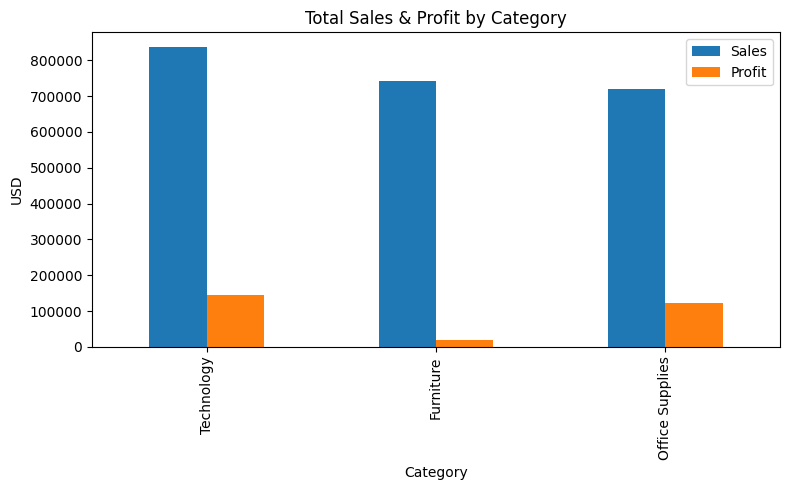

In [9]:

if 'Region' in df.columns:
    region_summary = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
    region_summary.plot(kind='bar', title='Total Sales & Profit by Region')
    plt.ylabel('USD')
    plt.tight_layout()
    plt.show()

if 'Category' in df.columns:
    cat_summary = df.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
    cat_summary.plot(kind='bar', title='Total Sales & Profit by Category')
    plt.ylabel('USD')
    plt.tight_layout()
    plt.show()



**Comment:**  
Regional and category-level summaries reveal where the company earns most and where margin optimization may be needed.


## 8) Product-Level Insights

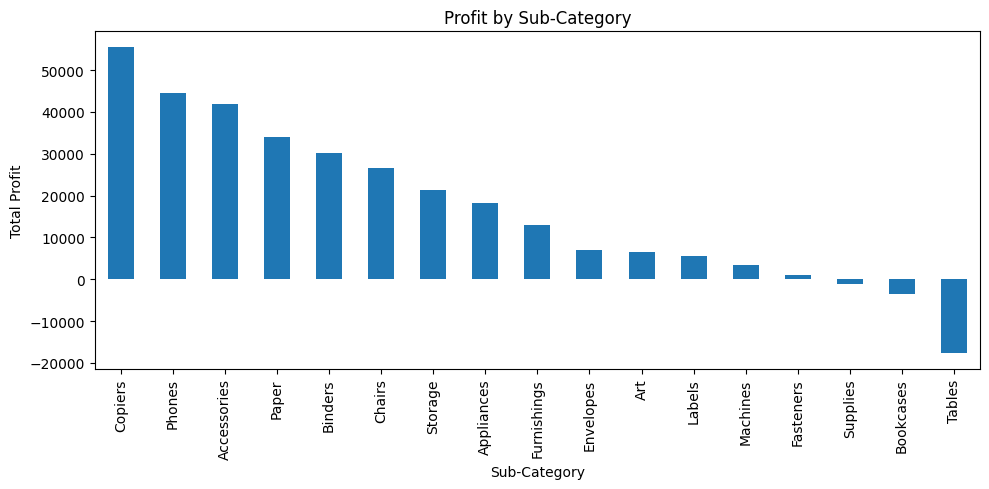

Top 5 most profitable sub-categories:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

Top 5 least profitable sub-categories:
Sub-Category
Machines      3384.7569
Fasteners      949.5182
Supplies     -1189.0995
Bookcases    -3472.5560
Tables      -17725.4811
Name: Profit, dtype: float64


In [10]:

if 'Sub-Category' in df.columns:
    subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    subcat_profit.plot(kind='bar')
    plt.title('Profit by Sub-Category')
    plt.ylabel('Total Profit')
    plt.tight_layout()
    plt.show()

    print('Top 5 most profitable sub-categories:')
    print(subcat_profit.head())
    print('\nTop 5 least profitable sub-categories:')
    print(subcat_profit.tail())



**Comment:**  
Highlight top and bottom performing product segments — key for procurement or pricing decisions.


## 9) Time-Series Trends

/var/folders/ny/4tw5tw4d54v19gln_91znxxr0000gn/T/ipykernel_44576/3664633090.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Order Date').resample('M')[['Sales','Profit']].sum()


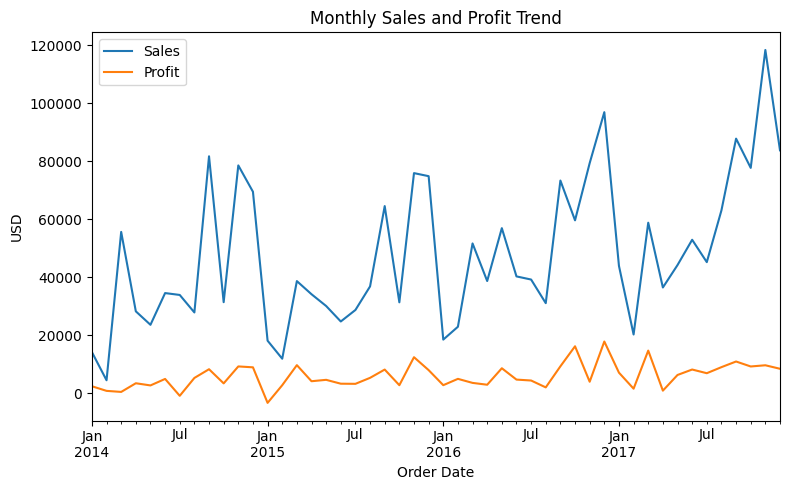

In [11]:

if 'Order Date' in df.columns:
    monthly = df.set_index('Order Date').resample('M')[['Sales','Profit']].sum()
    monthly.plot(title='Monthly Sales and Profit Trend')
    plt.ylabel('USD')
    plt.tight_layout()
    plt.show()



**Comment:**  
Seasonal peaks and dips help inform inventory and promotional planning.  
Look for consistent end-of-year sales spikes (holiday effect).


## 10) Customer & State Analysis

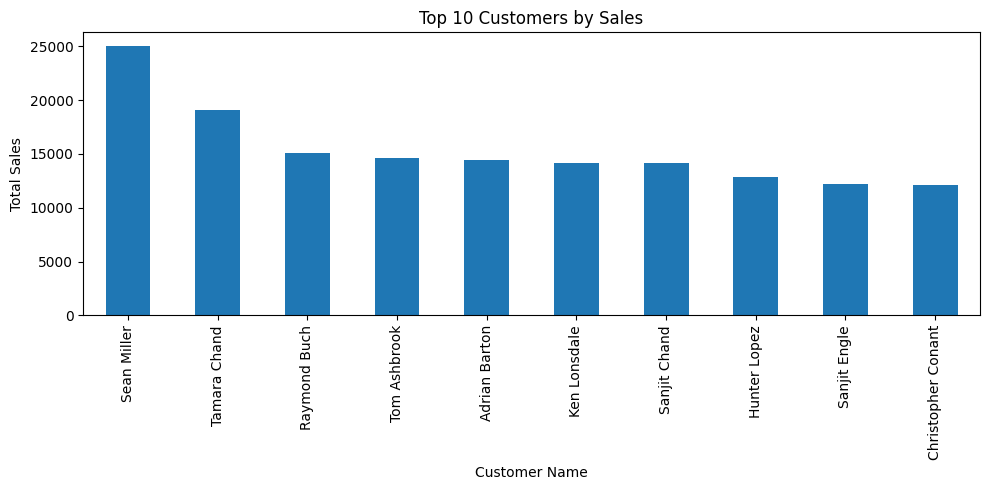

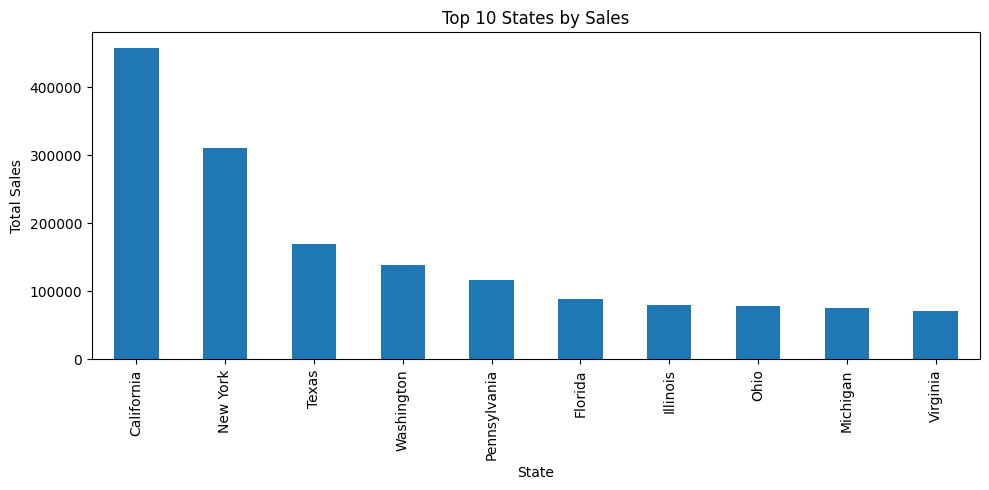

In [12]:

if 'Customer Name' in df.columns:
    top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    top_customers.plot(kind='bar')
    plt.title('Top 10 Customers by Sales')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

if 'State' in df.columns:
    top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    top_states.plot(kind='bar')
    plt.title('Top 10 States by Sales')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()



**Comment:**  
This shows customer concentration — whether revenue is broad-based or driven by a small number of accounts or regions.



## 11) Summary & Insights

**Findings (example — replace with your actual results):**
- **West region** leads in sales and profit, while **Central** lags behind.
- **Technology category** drives most profit; **Furniture** has mixed results.
- Heavy **discounting** strongly reduces profit margins.
- Seasonal spikes in **Q4** hint at holiday-driven sales boosts.

**Next Steps:**
1. Dive deeper into **profitability by product** — identify loss-makers.  
2. Analyze **shipping delays vs customer region** for efficiency.  
3. Use this EDA as input for **RFM segmentation** (customer-level analysis).

---

**Deliverable:**  
This notebook provides high-level business understanding and visual foundations to support further modeling and segmentation work.
